# Support Vector Machine (SVM)
---

- A Support Vector Machine (SVM) is a powerful and versatile supervised machine learning model used primarily for classification and regression tasks. It is particularly well-known for its ability to handle high-dimensional data and perform well even when the data isn't linearly separable.

### Components
---
1. Classification: The main idea in SVM classification is to find the optimal hyperplane (a line in 2D, a plane in 3D, or an n-dimensional surface in higher dimensions) that best separates different classes in the feature space. The optimal hyperplane is the one that maximizes the margin between the closest points of the classes, which are known as support vectors. This concept is fundamental to SVM’s effectiveness, as a larger margin is associated with lower generalization error of the classifier.
2. Kernels: When data is not linearly separable, SVM can still be used efficiently by employing a kernel trick. A kernel function transforms the input data into a higher-dimensional space where a linear separation is possible. Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid.
3. Regression (SVR): In support vector regression (SVR), the concept is similar but the goal is to fit the best line within a threshold margin of tolerance (ε) where the errors are tolerated, striving to keep most of the data points within the margin. The model focuses on the points that are within this ε margin.
4. Margin and Support Vectors: In both SVM for classification and SVR, the data points that determine the position and orientation of the hyperplane are the support vectors. They are called support vectors because they support or define the boundary decision surfaces.
Optimization: Training an SVM involves solving a complex optimization problem that seeks to minimize an objective function. This function is usually a combination of maximizing the margin between classes and minimizing the classification errors.

# SVM - Classification
---

- In classification tasks, a Support Vector Machine (SVM) works by finding the best boundary that divides the data into classes. This boundary is defined as the hyperplane that maximizes the margin between the closest members of separate classes. These members are called support vectors.

## Components
---

### 1. Defining Hyperplane

A hyperplane is a decision surface that separates different classes in the feature space. In two dimensions, this hyperplane can be thought of as a line. In three dimensions, it's a plane, and in higher dimensions, it generalizes to a multidimensional surface.
The goal of the SVM is to find a hyperplane that best divides the classes in such a way that the margin between the closest data points of different classes (support vectors) is maximized.

### 2. Maximizing the Margin

The margin is defined as the distance between the hyperplane and the nearest data point from each class. Maximizing this margin is intended to increase the model's generalization ability on unseen data.
A larger margin implies a lower generalization error, making the classifier more robust.

#### 2.1 Using the Kernel Trick:

Often, data in real-world scenarios is not linearly separable—that is, a single line cannot separate the classes without errors. In such cases, SVM uses a mathematical function known as a kernel to transform the data into a higher dimensional space where a linear separation is possible.
Common kernels include linear, polynomial, radial basis function (RBF), and sigmoid. The choice of kernel depends on the data and the specific requirements of the application.

### 3. Support Vectors

Support vectors are the data points nearest to the hyperplane, and they directly influence its position and orientation. Only these points are relevant in defining the hyperplane and in the decision function constructed by the SVM, which makes SVM models computationally efficient, especially when dealing with high-dimensional data.

### 4. Solving the Optimization Problem

The process of finding the optimal hyperplane is an optimization problem. SVMs use quadratic programming to solve this optimization problem. The objective is to maximize the margin while minimizing the classification error.

### 5. Handling Misclassifications

In practice, perfectly separating the classes might not be possible, or it might lead to overfitting. To manage this, SVM introduces a slack variable (ξ) that allows some data points to be misclassified or to fall within the margin, providing a more flexible and generalizable model.

### 6. Binary and Multiclass SVM:
Standard SVMs are inherently binary classifiers, which means they can distinguish between two classes. For multiclass problems, strategies like one-vs-all or one-vs-one are used, where multiple SVM classifiers are trained.

# Mathematics Behind SVC
---

## Linear SVM

In the simplest case, the SVM is used to find the optimal hyperplane that linearly separates two classes. The hyperplane can be described mathematically as:
\begin{equation}
w \cdotp x+b=0
\end{equation}

Where:

$w$ is the weight vector perpendicular to the hyperplane.

$x$ is the input data vector.

$b$ is the bias term, shifting the hyperplane along the weight vector.

### 1. Margin and Support Vectors
The objective of SVM is to maximize the margin, which is the distance between the closest points of the two classes, known as support vectors. These points satisfy the equations:
\begin{equation}
w \cdotp x_{+}+b=1 \text{ for the positive class}
\end{equation}

\begin{equation}
w \cdotp x_{-}+b=-1 \text{ for the negative class}
\end{equation}

### 2. The Margin $M$

$M$ is given by the distance between these two planes, which is calculated as:

\begin{equation}
M = \frac{2}{||w||}
\end{equation}

​The goal is to maximize the margin, $𝑀$, which is equivalent to minimizing $||w||^2$. Hence, the optimization problem becomes:
\begin{equation}
min_{w,b}\frac{1}{2}|||w||^2 \text{ the objective function which is subject to } y_i \cdotp (w \cdotp x_{i}+b) \geq 1, \forall i
\end{equation}

Here, $y_i$ are the labels of the training samples $x_i$, which are either +1 or -1.

### 3. Soft Margin SVM

To allow misclassifications (for data that is not linearly separable), we introduce slack variables $\xi_i$ which measure the degree of misclassification of the data $x_i$. The optimization problem becomes:

\begin{equation}
min_{w,b,\xi}\frac{1}{2}|||w||^2 + C \cdotp \Sigma_{i=1}^n \xi_i \text{ the objective function which is subject to } y_i \cdotp (w \cdotp x_{i}+b) \geq 1-\xi_i, \forall i \text{ and } \xi_i \geq 0
\end{equation}

Where $C$ is a regularization parameter that determines the trade-off between achieving a low training error and a high margin.

### 4. The Kernel Trick

For non-linearly separable data, the kernel trick is used to map input data into a higher-dimensional space where a linear separation is possible. The kernel function replaces the dot product in the high-dimensional space:

1. Linear Kernel $\mathbf{K}(x_i,x_j) = x_i \cdotp x_j$
2. Polynomial Kernel $\mathbf{K}(x_i,x_j) = (1+x_i \cdotp x_j)^d$
3. Radial Basis Function (RBF) $\mathbf{K}(x_i,x_j) = e^{-\gamma||x_i - x_j||}$
4. Sigmoid $\mathbf{K}(x_i,x_j) = tanh(\alpha \cdotp x_i \cdotp x_j + c)$

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

## Data Simulation Studies

In the absence of real world data, datasets are actually simulated to reflect real world scenarios

In [80]:
centers = [(-5, -5), (5, 5)]
X, y = make_blobs(n_samples=1000, centers=centers, shuffle=False, cluster_std=2.5,random_state=42)

In [81]:
df = pd.DataFrame(X, columns=["X1","X2"])
df["Y"] = y
df

,X1,X2,Y
0,-3.758215,-5.345661,0
1,-3.380779,-1.192425,0
2,-5.585383,-5.585342,0
3,-1.051968,-3.081413,0
4,-6.173686,-3.643600,0
...,...,...,...
995,7.001024,6.885728,1
996,7.972283,6.770760,1
997,5.878621,7.675376,1
998,4.933697,2.795313,1


In [82]:
df.Y.value_counts()

0    500
1    500
Name: Y, dtype: int64

## Classes

<Axes: xlabel='X1', ylabel='X2'>

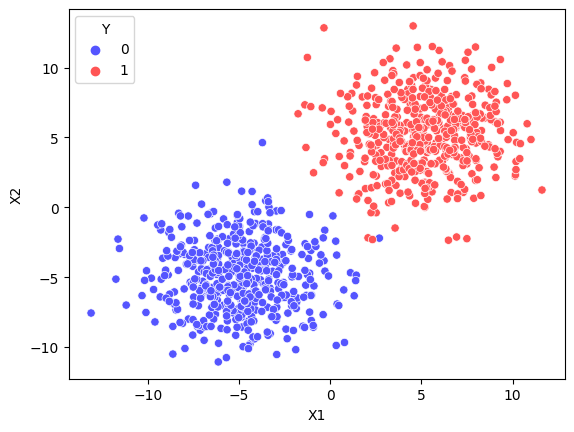

In [83]:
sns.scatterplot(x='X1',y='X2',hue='Y',
                data=df,palette='seismic')

## Separating Hyperplane

Our goal with SVM is to create the best separating hyperplane. In 2 dimensions, this is simply a line.

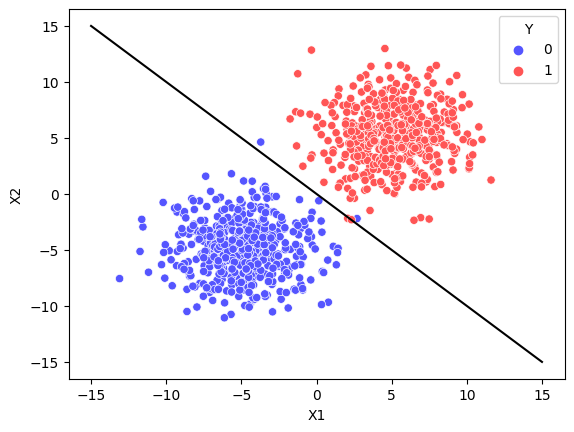

In [84]:
sns.scatterplot(x='X1',y='X2',hue='Y',palette='seismic',data=df)

# We want to somehow automatically create a separating hyperplane ( a line in 2D)

x = np.linspace(-15,15,1000)
m = -1
b = 0
y = m*x + b
plt.plot(x,y,'k')

## SVM - Support Vector Machine

In [85]:
from sklearn.svm import SVC # Supprt Vector Classifier

In [86]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

**NOTE: For this example, we will explore the algorithm, so we'll skip any scaling or even a train\test split for now**

In [87]:
y = df['Y']
X = df.drop('Y',axis=1) 

In [88]:
model = SVC(kernel='linear', C=1000)
model.fit(X, y)

SVC(C=1000, kernel='linear')

In [89]:
# This is imported from the supplemental .py file
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html
from svm_margin_plot import plot_svm_boundary

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


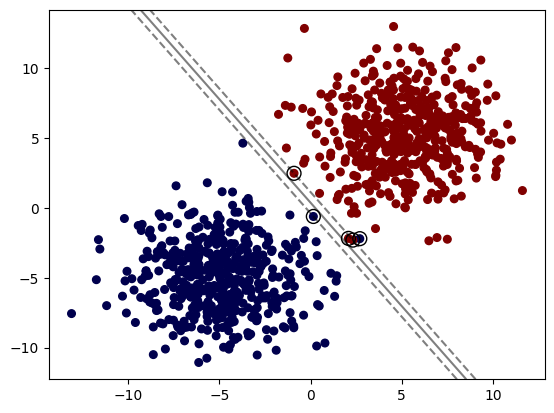

In [90]:
plot_svm_boundary(model,X,y)

## Hyper Parameters

### C

Regularization parameter. The strength of the regularization is **inversely** proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

*Note: If you are following along with the equations, specifically the value of C as described in ISLR, C in scikit-learn is **inversely** proportional to this value.*

In [91]:
model = SVC(kernel='linear', C=0.05)
model.fit(X, y)

SVC(C=0.05, kernel='linear')

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


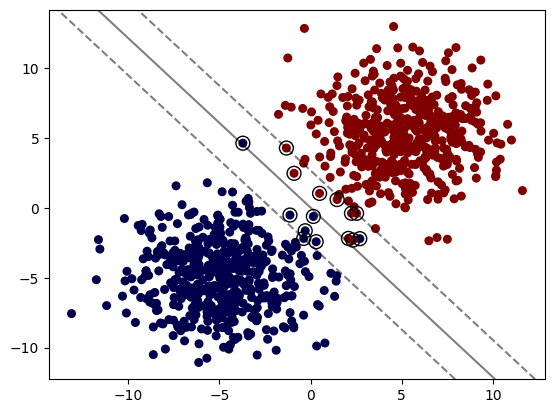

In [92]:
plot_svm_boundary(model,X,y)

### Kernel

[Choosing a Kernel](https://stats.stackexchange.com/questions/18030/how-to-select-kernel-for-svm?rq=1)

#### rbf - [Radial Basis Function](https://en.wikipedia.org/wiki/Radial_basis_function_kernel)


When training an SVM with the Radial Basis Function (RBF) kernel, two parameters must be considered: C and gamma. The parameter C, common to all SVM kernels, trades off misclassification of training examples against simplicity of the decision surface. A low C makes the decision surface smooth, while a high C aims at classifying all training examples correctly. gamma defines how much influence a single training example has. The larger gamma is, the closer other examples must be to be affected.

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


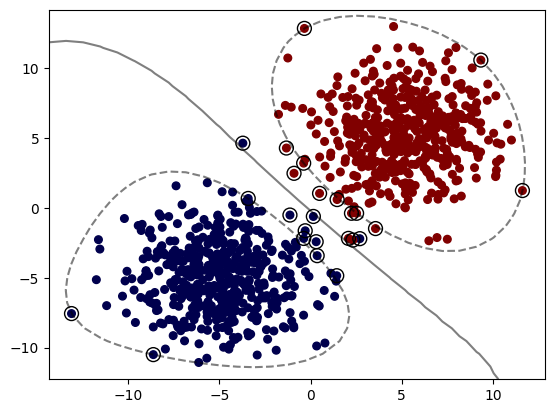

In [93]:
model = SVC(kernel='rbf', C=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


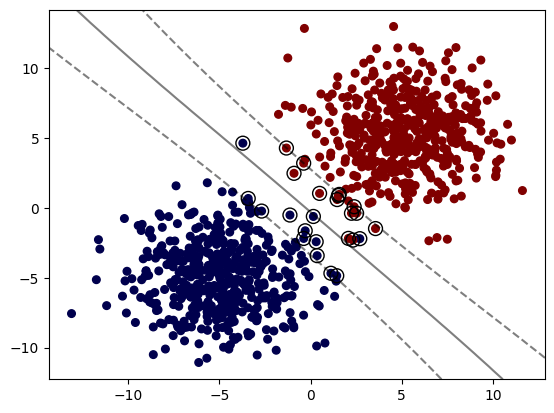

In [94]:
model = SVC(kernel='sigmoid')
model.fit(X, y)
plot_svm_boundary(model,X,y)

#### Degree (poly kernels only)

Degree of the polynomial kernel function ('poly').
Ignored by all other kernels.

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


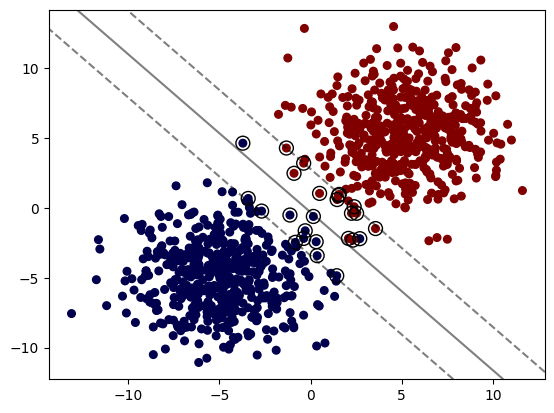

In [95]:
model = SVC(kernel='poly', C=1,degree=1)
model.fit(X, y)
plot_svm_boundary(model,X,y)

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


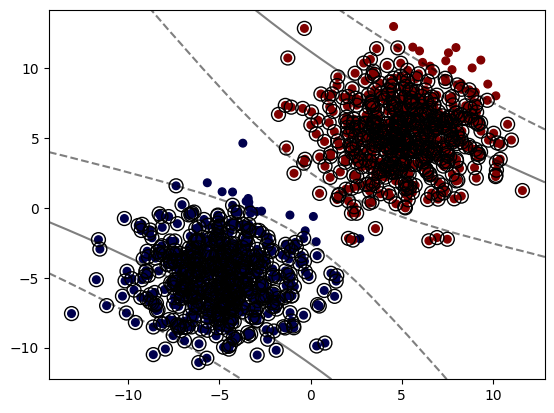

In [96]:
model = SVC(kernel='poly', C=1,degree=2)
model.fit(X, y)
plot_svm_boundary(model,X,y)

### gamma

gamma : {'scale', 'auto'} or float, default='scale'
    Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.

    - if ``gamma='scale'`` (default) is passed then it uses
      1 / (n_features * X.var()) as value of gamma,
    - if 'auto', uses 1 / n_features.

/Users/gerardompad/.pyenv/versions/3.8.16/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


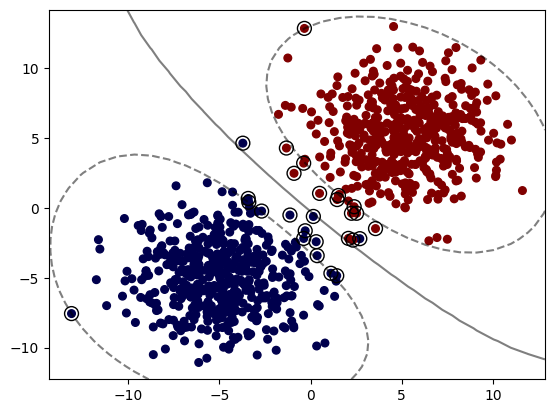

In [97]:
model = SVC(kernel='rbf', C=1,gamma=0.01)
model.fit(X, y)
plot_svm_boundary(model,X,y)

## Grid Search

Keep in mind, for this simple example, we saw the classes were easily separated, which means each variation of model could easily get 100% accuracy, meaning a grid search is "useless".

In [98]:
from sklearn.model_selection import GridSearchCV

In [99]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)

In [100]:
# Note again we didn't split Train|Test
grid.fit(X,y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [101]:
# 100% accuracy (as expected)
grid.best_score_

0.999

In [102]:
grid.best_params_

{'C': 1, 'kernel': 'linear'}